# NAME - SHREE S NADGAUDA
# REGISTRATION NUMBER - 20BCI7133
# COLLEGE NAME - VIT AP UNIVERSITY
# ASSIGNMENT 2
# DATE - 28/05/2023


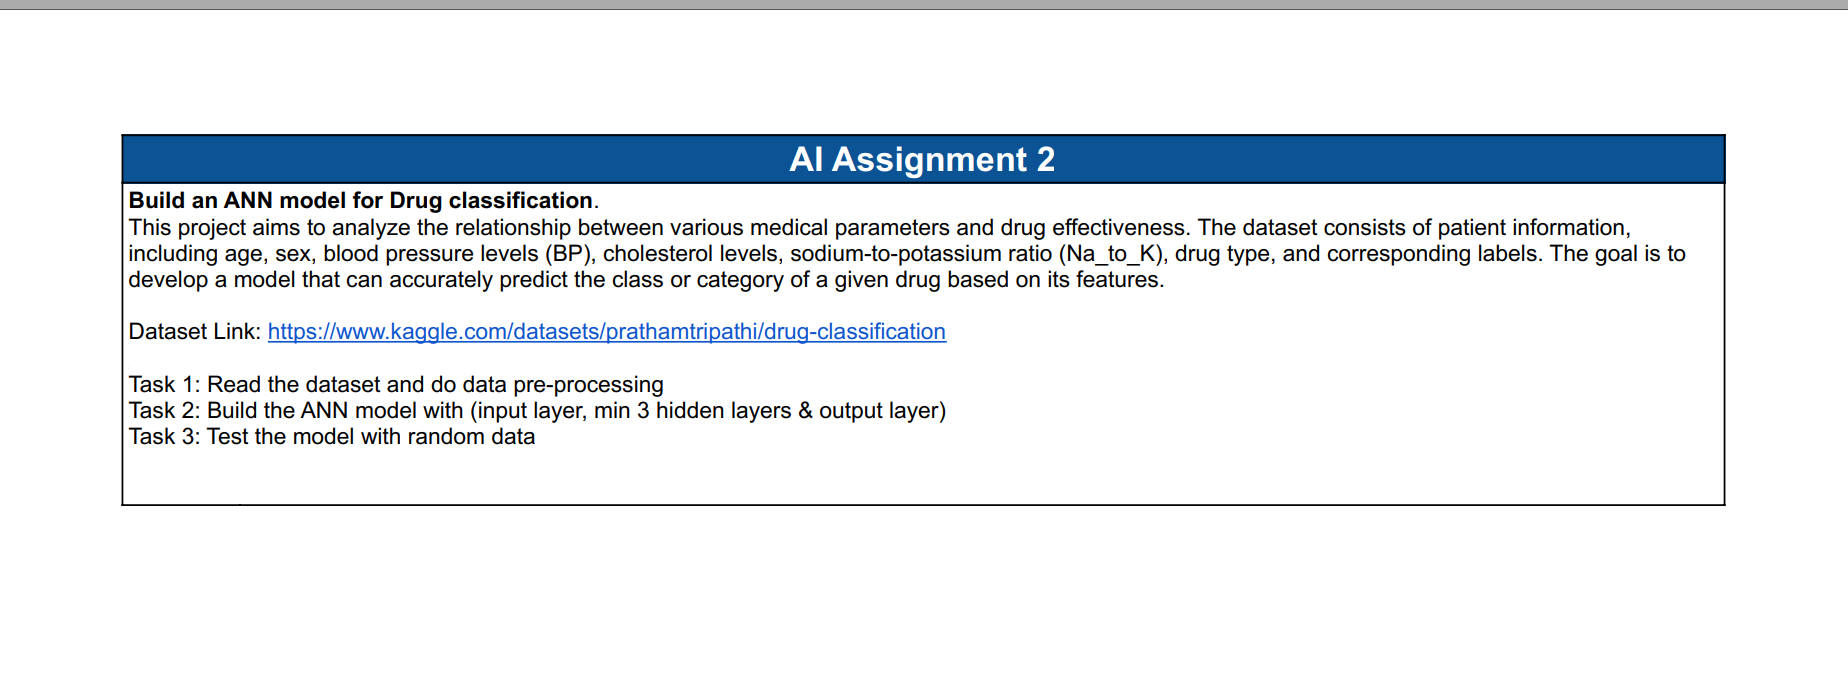

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Task 1: Read the dataset and do data pre-processing
# Read the dataset
df = pd.read_csv('drug200.csv')
df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [20]:
#separating features from labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [22]:
#Label encoding to convert string to numerical values
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


OH = OneHotEncoder()
encoded_y = OH.fit(y.reshape(-1,1))
y = encoded_y.transform(y.reshape(-1,1)).toarray()

In [23]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

160
40
160
40


In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#ANN


In [28]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=5, activation='relu'))
outputs =  len(set(df["Drug"]))
ann_model.add(tf.keras.layers.Dense(units=outputs, activation='softmax'))

In [36]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
ann_model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.6121 - accuracy: 0.2750
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5991 - accuracy: 0.3313
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5839 - accuracy: 0.3875
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5667 - accuracy: 0.4625
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5484 - accuracy: 0.5312
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5277 - accuracy: 0.5125
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5049 - accuracy: 0.5250
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4776 - accuracy: 0.5063
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4465 - accuracy: 0.5125
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4160 - accuracy: 0.5063
Epoch 11/

In [38]:
y_pred = ann_model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [43]:
y_pred_outputs = []
for output in y_pred:
    output_list = [0] * outputs
    output_list[np.where(output == max(output))[0][0]] = 1
    y_pred_outputs.append(output_list)

accuracy_score(y_test, y_pred_outputs)


0.975